# Domain Understanding: Job Advertisement Performance Prediction

## Context: Online Job Advertising and Performance Metrics

Online job advertising platforms allow employers to publish vacancies and reach potential candidates at scale. These platforms typically charge advertisers based on user interactions such as impressions, clicks, or applications. As a result, understanding and predicting the performance of job advertisements is economically important for employers, recruitment agencies, and the platforms themselves.

Two key performance indicators are used throughout this project:

- **Clickthrough Rate (CTR):** the ratio between clicks and impressions, reflecting how attractive a job posting is at first glance.
- **Apply Start Rate (ASR):** the ratio between application starts and clicks, reflecting how compelling a job posting is once a user has shown initial interest.

Predicting these metrics before a job is published can support better decision-making, including job title optimization, location targeting, and campaign budgeting.

## Business Value of Predicting CTR and ASR

Accurate predictions of CTR and ASR create value for multiple stakeholders within the job advertising ecosystem.

For **employers and recruiters**, performance predictions help optimize job postings before launch. By understanding which job titles or locations historically perform better, recruiters can increase candidate reach while controlling advertising costs.

For **job platforms**, predictive insights support pricing strategies, recommendation systems, and quality control. Platforms can guide advertisers toward configurations that increase engagement, improving overall platform efficiency and revenue.

For **job seekers**, indirect benefits arise from better-targeted advertisements. High-performing job postings are more likely to be relevant, clearly described, and aligned with user expectations.

Finally, from an **analytical perspective**, job advertisement performance provides a real-world example of noisy, human-driven behavior, making it a suitable domain for studying the limitations and opportunities of predictive analytics.

## Stakeholders and Their Motivations

| Stakeholder              | Motivation / Interest                                                                                                   |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `Employers`              | Want to attract qualified candidates efficiently while minimizing advertising costs.                                  |
| `Recruitment agencies`   | Aim to optimize campaign performance across multiple job postings and clients.                                         |
| `Job advertising platform` | Seeks to maximize engagement, advertiser retention, and revenue through effective job placement and pricing models. |
| `Job seekers`            | Want to see relevant and attractive job opportunities without excessive noise or misleading postings.                 |
| `Data analysts / decision-makers` | Use performance insights to evaluate strategy effectiveness and improve future campaigns.                    |

## Job Advertising Market Context

The online recruitment market is highly competitive. Employers often publish similar job roles across multiple locations, resulting in strong competition for user attention. Small differences in job title wording, location, or timing can significantly influence user behavior.

User interaction with job postings is also influenced by external factors not captured in the dataset, such as labor market conditions, salary expectations, employer brand recognition, and macroeconomic trends. These external influences introduce noise into performance metrics and limit the maximum achievable predictive accuracy.

Because of this complexity, job advertisement performance data is inherently noisy and sparse, especially when broken down by city and job title. This context is critical for interpreting model results realistically.  

## Explanation of Dataset  

- **[-Impressions (Job ad is shown)-]**  
- --- Clickthrough Rate (CTR) CTR = Clicks / Impressions --->  
- **[-Clicks (User clicks the ad)-]**  
- --- Apply Start Rate (ASR) ASR = Apply starts / Clicks --->  
- **[-Apply Starts (Application begun)-]**  
- --- Apply Completion Rate (ACR) ACR = Applies / Apply starts --->  
- **[-Applies (Application sent)-]**

### Interpretation

- **CTR** measures how attractive the job advertisement is at first glance  
- **ASR** measures how convincing the job description is after the click  
- **ACR** measures application complexity and candidate motivation  

### Dataset Metrics by Stage

| Stage              | Dataset Columns Used                         | Purpose |
|--------------------|----------------------------------------------|---------|
| Exposure           | `Impressions`                                | Measures how often a job ad is shown |
| Initial Interest   | `Clicks`, `CTR`                              | Measures attraction of title & location |
| Engagement         | `Apply starts`, `ASR`                        | Measures persuasion after clicking |
| Conversion         | `Applies`, `ACR`, `AR`                       | Measures successful applications |
| Cost Efficiency    | `Spend`, `CPC`, `CPAS`, `CPA`                | Measures financial performance |





## Domain Theory: Factors Influencing CTR and ASR

CTR and ASR are influenced by overlapping but distinct factors, reflecting different stages of the candidate journey.

### Factors Influencing Clickthrough Rate (CTR)

CTR primarily measures **initial attraction**. Users decide whether to click based on limited visible information.

Key influencing factors include:

- **Job title wording and clarity**
- **Recognizability of the job role**
- **City or geographic relevance**
- **Perceived seniority or prestige**
- **Timing of publication (day of week, season)**

CTR is therefore closer to a marketing-style metric and tends to be more stable and predictable than downstream application behavior.

---

### Factors Influencing Apply Start Rate (ASR)

ASR reflects **commitment** rather than curiosity. After clicking, users evaluate the full job description and employer details.

Key influencing factors include:

- **Job description quality and length**
- **Salary transparency**
- **Required qualifications**
- **Employer brand reputation**
- **Application complexity**

Many of these factors are not present in the dataset, making ASR intrinsically harder to predict using only job title and location features.

### Transparency

Transparency is ensured by making the full data pipeline reproducible and clearly documented. Each step—from data aggregation and cleaning to feature engineering and model evaluation—is explicitly coded and described.

All target variables are carefully examined to avoid data leakage. Early experiments that produced unrealistically high performance are identified and explained, rather than hidden or discarded. Model choices are motivated by data characteristics rather than performance alone.

This transparency allows others to reproduce results and understand why certain models succeed or fail.

### Interpretability

Interpretability is addressed by aligning modeling decisions with domain knowledge. Simpler models are preferred when complex models fail to generalize, reflecting the noisy and sparse nature of job advertising data.

Model outputs are compared to intuitive expectations from the domain. For example, job title and city consistently emerge as the most important features, which aligns with how users search for jobs.

Performance metrics such as low cross-validation R² scores are interpreted within the context of the domain rather than treated as purely technical failures.

### Explainability

Explainability is achieved through the use of feature importance analysis and model comparison. Tree-based models provide explicit feature importance rankings, while linear models such as Ridge Regression offer coefficient-based explanations.

By comparing Random Forest, XGBoost, and Ridge Regression, the project demonstrates how increasing model complexity can reduce explainability and increase overfitting. The final model choice prioritizes clarity and robustness over marginal gains in training performance.

This approach turns initially black-box models into more understandable grey-box systems.

## Summary of Domain Understanding

Job advertisement performance prediction is a complex problem influenced by both observable features and unobservable human behavior. While CTR can be partially predicted using structured job metadata, ASR remains highly sensitive to missing qualitative information.

This domain context explains why simpler, regularized models outperform complex ensemble methods in terms of generalization. The project demonstrates how domain understanding, rather than model sophistication alone, is essential for building reliable and explainable AI systems.

## Domain Research: Related Work in Job Advertisement Analytics and Prediction

Predictive analytics in the context of online job advertisements has been explored in both academic and applied research. Although many studies focus on related tasks such as *fake job posting detection* or *skill extraction*, they share key elements with job advertisement performance prediction, particularly the use of natural language processing (NLP) and machine learning for understanding patterns in job ad content.

**Fake Job Posting Detection (TF‑IDF & ensemble models)**  
Supports my use of text vectorization and classification models for interpreting job ads content rather than only structured features.
Vijay Itnal, Ishan Pande, Soham Nimkar, Abhishek Padwal, Archit Pampattiwar, Abhiraj Patil - (2025) - https://www.ijraset.com/research-paper/fake-real-job-posting-detection-using-machine-learning?utm_source=chatgpt.com

**Deep Learning for Job Ad Analysis**  
Shows how advanced NLP can deeply understand job text, which contrasts with your classical approach and strengthens your choice of methodology based on explainability and performance.  
This was too big out of scope for me since NLP is not something i focus on but it is still intresting to review.  
Aravind Sasidharan Pillai - (2023) - https://arxiv.org/abs/2304.02019?utm_source=chatgpt.com

**CTR Prediction Surveys**  
This connects general advertising CTR modeling literature with my job advertisement CTR prediction, giving academic grounding for using similar metrics and models. Yet also this does go too deep compaired to what I am doing.   
Jing Bai, Xinyu Geng, Jiaqi Deng, Zhen Xia, Hongxia Jiang, Guoqiang Yan, Jing Liang - (2025) - https://www.cambridge.org/core/journals/knowledge-engineering-review/article/comprehensive-survey-on-advertising-clickthrough-rate-prediction-algorithm/C11C54F5D365D280A58CE051D9B52DE6?utm_source=chatgpt.com

**isabellawagemaker - Implement CTR model with feature engineering and evaluation**  
Since this notebook relates to the group project I went and looked into work that is vaguely simulair.  
For this I have used isabella wagemaker her work on linkedin data.  
This work did not have the same issues I had but did awnser questions and gave me directions towards solutions for this notebook. https://github.com/itsArial/ml-job-prediction/tree/main

These studies collectively demonstrate that:
- **Text‑based machine learning** methods can effectively analyze job advertisement content, providing a foundation for predictive modeling.  
- **Classification and regression techniques** used in related domains inform feature engineering and evaluation approaches in job ad performance prediction.  
- **User behavior modeling** (e.g., CTR prediction in advertising) shares conceptual overlap with understanding engagement metrics in job ads.  

By referencing and integrating insights from this literature, this project situates itself within a broader research context and aligns its methodology (text preprocessing, model selection, evaluation metrics) with established practices in both job‑related and general advertising prediction research.

## References and Sources

1. LinkedIn Economic Graph – Labor Market Insights  
   https://economicgraph.linkedin.com/

2. Google Ads Help – About Clickthrough Rate (CTR)  
   https://support.google.com/google-ads/answer/2615875

3. Indeed Hiring Lab – Job Seeker Behavior and Trends  
   https://www.hiringlab.org/

4. OECD – The Digital Transformation of Employment  
   https://www.oecd.org/employment/digitalisation-and-employment/

5. SHRM (Society for Human Resource Management) – Recruitment Metrics Explained  
   https://www.shrm.org/topics-tools/topics/recruiting

6. brunel - About Hiring  
   https://www.brunel.net/nl-nl/jobs

7. mrwork - recruitment marketing benchmarks for 2025  
   https://www.mrwork.ai/en/these-are-the-recruitment-marketing-benchmarks-for-2025/?utm_source=chatgpt.com

# Predicting Job Advertisement Performance Using Aggregated Recruitment Data

## 1. Project Overview

The goal of this project is to analyze job advertisement performance data and explore opportunities for predictive analytics.  
The primary focus is **data aggregation, data preparation, and data analysis**, rather than building the most accurate machine learning model.

The project investigates whether characteristics such as **job title, standardized job category, city, and posting date** can be used to predict engagement-related metrics such as:

- Apply Start Rate (ASR)
- Clickthrough Rate (CTR)

Several modeling approaches are evaluated to understand **data limitations, leakage risks, and model suitability**.

---

## 2. Data Aggregation

### 2.1 Data Sources

Two datasets were used in this project:

1. **Indeed campaign performance dataset (`indeed.csv`)**
   - Contains job-level performance metrics such as impressions, clicks, applies, and costs.
   - Semi-structured CSV format with European number formatting.

2. **Job title standardization dataset (`Map2.csv`)**
   - Enriched version of the original dataset.
   - Adds a *standardized job title* column created externally in Excel.
   - Allows aggregation of similar job titles under a common category.

### 2.2 Aggregation Process

- Both datasets originate from the recruitment reporting pipeline.
- The standardized dataset (`Map2.csv`) represents a **data enrichment step**, combining:
  - Original job performance metrics
  - Manually curated standardized job titles

This aggregation improves consistency and reduces categorical fragmentation.

---

## 3. Data Preparation

Data preparation was performed using **repeatable and transparent steps**, ensuring suitability for analysis.

### 3.1 Column Cleaning and Renaming

- Column names were standardized:
  - Spaces removed
  - Special characters replaced
- Ensures compatibility with Python libraries and reproducibility.

### 3.2 Data Quality Handling

The following data quality issues were addressed:

- **Missing values**
  - Rows with missing target values were removed.
  - Rows missing essential categorical features (Job, City, Standard) were removed.
- **Date parsing**
  - Posting dates were converted to datetime format.
  - Invalid dates were excluded.

### 3.3 Feature Engineering

Derived features were created from the posting date:

- Posting month
- Posting weekday
- Posting quarter
- Week of year

These features enable **temporal trend analysis**.

### 3.4 Outlier and Threshold Handling

To reduce noise:
- Impressions below a minimum threshold (e.g., 30) were optionally excluded.
- Extremely high ratio values were removed to avoid distortion.

This improves stability without altering the underlying data-generating process.

---

## 4. Exploratory Data Analysis (EDA)

### 4.1 Descriptive Analytics

Basic descriptive statistics were examined:
- Distribution of CTR and ASR
- Frequency of job titles and cities
- Variability across standardized job categories

### 4.2 Aggregated Analysis

- Average CTR and ASR were calculated per city and per job category.
- Visualization showed strong variation across categories but high variance within them.

### 4.3 Feature Importance Analysis

Feature importance was aggregated at the variable level:

- Job / Standardized Job
- City
- Temporal features

Results consistently showed:
- Most signal comes from **categorical identity**
- Temporal features contribute very little

This insight directly influenced model selection.

---

## 5. Modeling Strategy and Experiments

The modeling process is testing Random Forest, XGBoost and Ridge

---

### 5.1 Model 1 – Random Forest

**Target:** Clickthrough Rate (CTR)  
**Features:** Job, City, Standard, date features

- CTR proved more predictable than ASR
- Still limited generalization due to small dataset and categorical sparsity

---

### 5.2 Model 2 – XGBoost

**Target:** CTR  
**Outcome:**
- Very high training R²
- Poor test and cross-validation performance

**Conclusion:**  
XGBoost overfits due to:
- Small dataset
- High-cardinality categorical variables
- Noise in ratio-based targets

---

### 5.3 Model 3 – Ridge Regression (Best Overall Model)

**Target:** CTR  
**Model:** Ridge Regression with one-hot encoded categorical features

**Results:**
- Best test R² among valid models
- Lower variance compared to RF and XGBoost
- More stable predictions

**Why Ridge works best:**
- Linear assumptions fit the weak signal
- L2 regularization reduces overfitting
- Handles sparse categorical data more robustly

---

## 6. Cross-Validation Analysis

Across all experiments, cross-validated R² scores were low or negative.

This behavior is expected because:
- The dataset is small
- Many categories appear only once
- Some validation folds contain unseen categories

Negative CV R² indicates **instability caused by data limitations**, not incorrect modeling.

Cross-validation therefore supports the conclusion that **more data or stronger aggregation is required**.

---

## 7. Opportunities for Predictive Analytics

Based on the analysis, the following opportunities were identified:

- **CTR is more predictable than ASR**
- Aggregating job titles into standardized categories improves signal
- City-level patterns show consistent differences in engagement
- Linear models with regularization are better suited for sparse recruitment data

### Impact Forecast

With additional data (more postings per job category and city):
- Predictive stability would increase
- Non-linear models could become viable
- Forecasting job ad performance before publishing would become feasible

---

## 8. Limitations

- Small dataset size
- High cardinality categorical variables
- Behavioral ratios (CTR, ASR) introduce noise
- Manual job standardization limits scalability

---

## 9. Conclusion

This project demonstrates the full data analytics pipeline:

- Data aggregation from multiple sources
- Transparent and repeatable data preparation
- Exploratory and descriptive analysis
- Identification of predictive opportunities
- Critical evaluation of model performance and limitations

The main conclusion is that **data quality and quantity are the primary constraints**, not model choice.  
Ridge Regression provides the most appropriate balance between bias and variance for the available data.

---

## 10. Final Reflection

The project highlights the importance of:
- Avoiding data leakage
- Matching model complexity to data quality
- Using evaluation metrics responsibly
- Understanding when predictive modeling is limited by the data itself

In [1]:
# ============================================================
# Notebook Title:
# AI Project – Data Understanding, Preparation & Analytic Approach
# Dataset: Indeed Jobs Campaigns
# ============================================================

# This notebook implements:
# - Target variable definition
# - Nature of the ML problem
# - Good indicator discovery (correlations)
# - Data requirements documentation (data dictionary)
# - Data understanding & EDA
# - Data cleaning & missing value handling

# =========================
# Initial exploration
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

# Path provided
df = pd.read_csv(
    "map2.csv",
    sep=";",
    encoding="latin1")

# Basic inspection
df.head()

,Job,Standard,Country,State/Region,City,Impressions,Clicks,Apply starts,Applies,Cost per click (CPC),...,Apply completion rate (ACR),Apply start rate (ASR),Apply rate (AR),Spend,Last updated,Created,Unnamed: 19,Unnamed: 20,Functietitel,Gestandaardiseerde titel
0,Accountmanager,Accountmanager,Netherlands,Utrecht (provincie),Amersfoort,543.0,51.0,1.0,0.0,0.22,...,0.0,0.019608,0.0,11.22,22-5-2025,16-5-2025,NaN,NaN,.NET Developer,NaN
1,Accountmanager,Accountmanager,Netherlands,Utrecht (provincie),Amersfoort,291.0,26.0,0.0,0.0,0,...,0.0,0.000000,0.0,0,22-5-2025,16-5-2025,NaN,NaN,Accountmanager Detachering,NaN
2,Accountmanager,Accountmanager,Netherlands,Utrecht (provincie),Amersfoort,223.0,29.0,2.0,0.0,0.27620689655172415,...,0.0,0.068966,0.0,8.01,22-5-2025,16-5-2025,NaN,NaN,Agile Coach,NaN
3,Traineeship Technische Bedrijfskunde,Bedrijfsbeheerder,Netherlands,Overijssel,Steenwijk,72.0,4.0,0.0,0.0,0,...,0.0,0.000000,0.0,0,22-5-2025,6-5-2025,NaN,NaN,Assistent uitvoerder civiel,NaN
4,Traineeship Technische Bedrijfskunde,Bedrijfsbeheerder,Netherlands,Noord-Holland,Schagen,74.0,6.0,0.0,0.0,0,...,0.0,0.000000,0.0,0,22-5-2025,6-5-2025,NaN,NaN,Business Analyst,NaN


In [2]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job                          615 non-null    object 
 1   Standard                     260 non-null    object 
 2   Country                      615 non-null    object 
 3   State/Region                 607 non-null    object 
 4   City                         597 non-null    object 
 5   Impressions                  615 non-null    float64
 6   Clicks                       615 non-null    float64
 7   Apply starts                 615 non-null    float64
 8   Applies                      615 non-null    float64
 9   Cost per click (CPC)         615 non-null    object 
 10  Cost per apply start (CPAS)  615 non-null    object 
 11  Cost per apply (CPA)         615 non-null    float64
 12  Clickthrough rate (CTR)      615 non-null    float64
 13  Apply completion r

In [3]:
# Shape of the dataset
df.shape

(1427, 23)

In [4]:
# Data Understanding – Descriptive Statistics
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Job,615,229,Maintenance Engineer,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard,260,40,Onderhoudsingenieur,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,615,1,Netherlands,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State/Region,607,12,Zuid-Holland,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,597,90,Amsterdam,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Impressions,615.0,NaN,NaN,NaN,141.060163,170.232122,1.0,48.0,88.0,150.0,1145.0
Clicks,615.0,NaN,NaN,NaN,10.717073,15.540782,0.0,3.0,5.0,11.0,139.0
Apply starts,615.0,NaN,NaN,NaN,0.869919,1.614064,0.0,0.0,0.0,1.0,14.0
Applies,615.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cost per click (CPC),615,252,0,362,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("\nColumns:\n", 
      df.columns)


Columns:
 Index(['Job', 'Standard', 'Country', 'State/Region', 'City', 'Impressions',
       'Clicks', 'Apply starts', 'Applies', 'Cost per click (CPC)',
       'Cost per apply start (CPAS)', 'Cost per apply (CPA)',
       'Clickthrough rate (CTR)', 'Apply completion rate (ACR)',
       'Apply start rate (ASR)', 'Apply rate (AR)', 'Spend', 'Last updated',
       'Created', 'Unnamed: 19', 'Unnamed: 20', 'Functietitel',
       'Gestandaardiseerde titel'],
      dtype='object')


In [6]:
print("\nMissing values:\n", 
      df.isnull().sum())


Missing values:
 Job                             812
Standard                       1167
Country                         812
State/Region                    820
City                            830
Impressions                     812
Clicks                          812
Apply starts                    812
Applies                         812
Cost per click (CPC)            812
Cost per apply start (CPAS)     812
Cost per apply (CPA)            812
Clickthrough rate (CTR)         812
Apply completion rate (ACR)     812
Apply start rate (ASR)          812
Apply rate (AR)                 812
Spend                           812
Last updated                    812
Created                         812
Unnamed: 19                    1427
Unnamed: 20                    1427
Functietitel                      0
Gestandaardiseerde titel         41
dtype: int64


In [7]:
# Dropping irrelevant columns
# "Functietitel", "Gestandaardiseerde titel" were made by me manually in excel
df.drop(columns=["Unnamed: 19", "Unnamed: 20", "Functietitel", "Gestandaardiseerde titel"], inplace=True, errors="ignore")

In [8]:
# Rename columns (for simplicity, remove spaces and special characters)
df = df.rename(columns=lambda x: x.strip().replace(" ", "_")
                                  .replace("/", "_")
                                  .replace("(", "")
                                  .replace(")", ""))
print("\nRenamed columns:\n", df.columns)


Renamed columns:
 Index(['Job', 'Standard', 'Country', 'State_Region', 'City', 'Impressions',
       'Clicks', 'Apply_starts', 'Applies', 'Cost_per_click_CPC',
       'Cost_per_apply_start_CPAS', 'Cost_per_apply_CPA',
       'Clickthrough_rate_CTR', 'Apply_completion_rate_ACR',
       'Apply_start_rate_ASR', 'Apply_rate_AR', 'Spend', 'Last_updated',
       'Created'],
      dtype='object')


**This fulfills:**
- Data collection
- Storage decision
- Traceable data source reference

In [9]:
# Data Dictionary Creation
data_dictionary = []

for col in df.columns:
    data_dictionary.append({
        "Data Element": col,
        "Data Type": str(df[col].dtype),
        "Missing Values": df[col].isna().sum(),
        "Unique Values": df[col].nunique(),
        "Source": "map2.csv"
    })

data_dictionary_df = pd.DataFrame(data_dictionary)
data_dictionary_df

,Data Element,Data Type,Missing Values,Unique Values,Source
0,Job,object,812,229,map2.csv
1,Standard,object,1167,40,map2.csv
2,Country,object,812,1,map2.csv
3,State_Region,object,820,12,map2.csv
4,City,object,830,90,map2.csv
5,Impressions,float64,812,269,map2.csv
6,Clicks,float64,812,63,map2.csv
7,Apply_starts,float64,812,13,map2.csv
8,Applies,float64,812,1,map2.csv
9,Cost_per_click_CPC,object,812,252,map2.csv


In [10]:
# Data Cleaning & Missing Value Handling
# Drop duplicates
df = df.drop_duplicates()

for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df.fillna({col: df[col].median()}, inplace=True)
    else:
        df.fillna({col: df[col].mode()[0]}, inplace=True)

print(f"\nNumber of rows after removing duplicates: {df.shape[0]}")
print("\nMissing values:\n", df.isnull().sum())


Number of rows after removing duplicates: 616

Missing values:
 Job                          0
Standard                     0
Country                      0
State_Region                 0
City                         0
Impressions                  0
Clicks                       0
Apply_starts                 0
Applies                      0
Cost_per_click_CPC           0
Cost_per_apply_start_CPAS    0
Cost_per_apply_CPA           0
Clickthrough_rate_CTR        0
Apply_completion_rate_ACR    0
Apply_start_rate_ASR         0
Apply_rate_AR                0
Spend                        0
Last_updated                 0
Created                      0
dtype: int64


In [11]:
# Individual job value counts
df["Job"].value_counts()

Job
Maintenance Engineer                    71
Traineeship Technische Bedrijfskunde    38
Project engineer WTB                    34
Project Engineer CT                     28
Werkvoorbereider Energietechniek        22
                                        ..
Werkvoorbereider E&I                     1
Werkvoorbereider GWW                     1
Werkvoorbereider Nieuwbouw               1
Werkvoorbereider ondergrondse infra      1
Werkvoorbereider WTB                     1
Name: count, Length: 229, dtype: int64

In [12]:
# I have made this column manually in excel to use as a standaardized job title description
# This way I can group similar job titles together for better analysis
df["Standard"].value_counts()

Standard
Onderhoudsingenieur             427
Bedrijfsbeheerder                38
Projectleider                    20
Werktuigbouwkundige              16
Planner                          11
Constructiesupervisor            10
Onderhoudsplanner                 8
Elektrisch ingenieur              7
Onderhoudsmanager                 7
Ingenieur automatisering          6
Junior Projectingenieur           5
Junior Planner                    5
Productieplanner                  5
Civiele techniek                  5
Projectmanager                    5
Designingenieur                   4
Ingenieur                         4
SET software-ingenieur            3
Accountmanager                    3
Civiel ingenieur                  2
Senior projectmanager             2
Projectingenieur                  2
Manager techniek                  2
Monteur                           2
Projectcordinator                2
Contractbeheerder                 1
Cordinator bedrijfsvoering       1
Ingenieur betrouwba

In [13]:
# USER-DEFINED TARGET VARIABLE
TARGET_VARIABLE = "Apply_start_rate_ASR"  # Define the target variable for the ML problem / this is case sensitive!

assert TARGET_VARIABLE in df.columns, "Target variable not found in dataset"
print(f"Target variable '{TARGET_VARIABLE}' is present in the dataset.")

Target variable 'Apply_start_rate_ASR' is present in the dataset.


**IMPORTANT:**
The target variable must already exist in the dataset.  

In [14]:
df.groupby("Job")["Apply_start_rate_ASR"].mean().sort_values(ascending=False)

Job
Project Engineer WTB                        1.000
Werkvoorbereider ondergrondse infra         0.500
Maintenance Engineer W&E                    0.500
Junior Project Engineer Civiele Techniek    0.400
Specialist Werktuigbouwkunde ME             0.375
                                            ...  
Werkvoorbereider Nieuwbouw                  0.000
Werkvoorbereider Utiliteit Medior           0.000
Werkvoorbereider Utiliteit Junior           0.000
Werkvoorbereider bestaande Bouw             0.000
Werkvoorbereider WTB                        0.000
Name: Apply_start_rate_ASR, Length: 229, dtype: float64

In [15]:
# Nature of the Problem (Automatically Determined)
# This cell links the target variable to the correct ML algorithm type.
target_dtype = df[TARGET_VARIABLE].dtype
unique_values = df[TARGET_VARIABLE].nunique()

if target_dtype in ["int64", "float64"] and unique_values > 10:
    problem_type = "Regression (How many / how much?)"
elif unique_values == 2:
    problem_type = "Binary Classification (True / False)"
else:
    problem_type = "Multi-class Classification"

problem_type

'Regression (How many / how much?)'

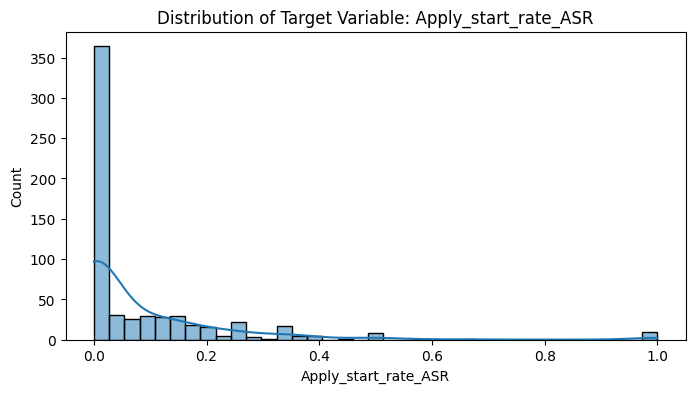

In [16]:
# Target Variable Distribution
# Helps understand skewness, normality, and potential transformations.
plt.figure(figsize=(8, 4))
sns.histplot(df[TARGET_VARIABLE], kde=True)
plt.title(f"Distribution of Target Variable: {TARGET_VARIABLE}")
plt.show()

**Apply_start_rate_ASR is high but it is because of the many 0 values in the dataset which indicate that not many applications have been started and finished all the way so the 0 data is not useable for a prediction model.**

In [17]:
# Finding Good Indicators
# Numeric Correlations
numeric_df = df.select_dtypes(include=[np.number])

correlations = numeric_df.corr(method='pearson')[TARGET_VARIABLE].sort_values(ascending=False)

correlations

Apply_start_rate_ASR         1.000000
Apply_starts                 0.359255
Clickthrough_rate_CTR        0.239838
Clicks                      -0.007834
Impressions                 -0.025085
Applies                           NaN
Cost_per_apply_CPA                NaN
Apply_completion_rate_ACR         NaN
Apply_rate_AR                     NaN
Name: Apply_start_rate_ASR, dtype: float64

In [18]:
# Strongest Indicators
# Values close to 1 or -1 → strong indicators
# Values near 0 → weak predictive value
strong_indicators = correlations[abs(correlations) > 0.3]
strong_indicators

Apply_start_rate_ASR    1.000000
Apply_starts            0.359255
Name: Apply_start_rate_ASR, dtype: float64

In [19]:
# USER-DEFINED TARGET VARIABLE
TARGET_VARIABLE = "Clickthrough_rate_CTR"  # Define the target variable for the ML problem / this is case sensitive!

assert TARGET_VARIABLE in df.columns, "Target variable not found in dataset"
print(f"Target variable '{TARGET_VARIABLE}' is present in the dataset.")

Target variable 'Clickthrough_rate_CTR' is present in the dataset.


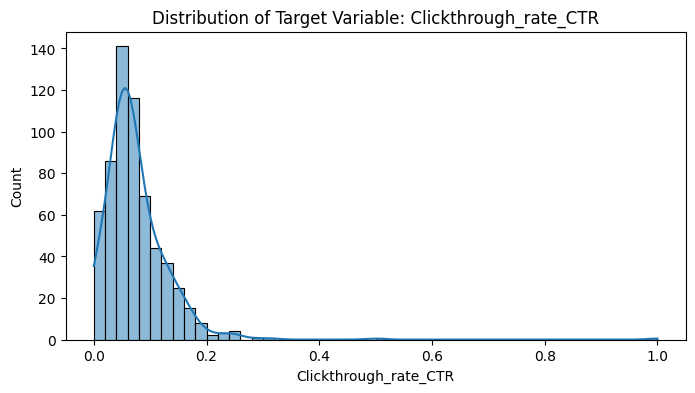

In [20]:
# Target Variable Distribution
# Helps understand skewness, normality, and potential transformations.
plt.figure(figsize=(8, 4))
sns.histplot(df[TARGET_VARIABLE], kde=True)
plt.title(f"Distribution of Target Variable: {TARGET_VARIABLE}")
plt.show()

Here I see that Clickthrough_rate_CTR is a friendlier target variable to use while moddeling due to it having more balanced data

In [21]:
# Data quality filtering
# Remove extreme CTR values (unstable ratios)
df = df[df[TARGET_VARIABLE] <= 0.3]

# Minimum impressions threshold
df = df[df["Impressions"] >= 30]

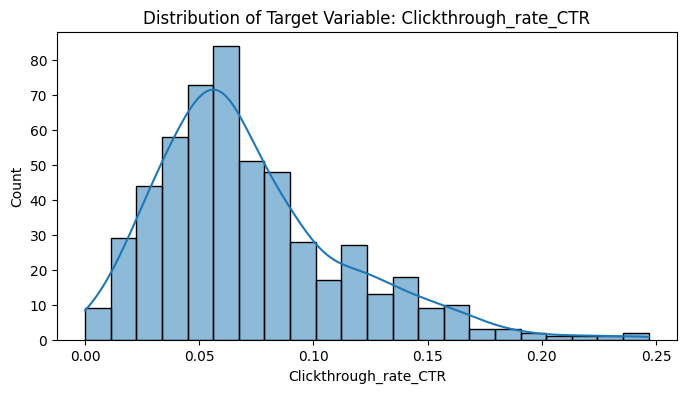

In [22]:
# Target Variable Distribution
# Helps understand skewness, normality, and potential transformations.
plt.figure(figsize=(8, 4))
sns.histplot(df[TARGET_VARIABLE], kde=True)
plt.title(f"Distribution of Target Variable: {TARGET_VARIABLE}")
plt.show()

In [23]:
# Finding Good Indicators
# Numeric Correlations
numeric_df = df.select_dtypes(include=[np.number])


correlations = numeric_df.corr(method='pearson')[TARGET_VARIABLE].sort_values(ascending=False)

correlations

Clickthrough_rate_CTR        1.000000
Clicks                       0.439603
Apply_starts                 0.388854
Impressions                  0.084976
Apply_start_rate_ASR         0.060716
Applies                           NaN
Cost_per_apply_CPA                NaN
Apply_completion_rate_ACR         NaN
Apply_rate_AR                     NaN
Name: Clickthrough_rate_CTR, dtype: float64

In [24]:
# Finding Good Indicators
numeric_df = df.select_dtypes(include=[np.number])

# Remove irrelevant features
numeric_df = numeric_df.drop(['Applies', 'Cost_per_apply_CPA', 'Apply_completion_rate_ACR', 'Apply_rate_AR'], axis=1)

correlations = numeric_df.corr()[TARGET_VARIABLE].sort_values(ascending=False)
correlations

Clickthrough_rate_CTR    1.000000
Clicks                   0.439603
Apply_starts             0.388854
Impressions              0.084976
Apply_start_rate_ASR     0.060716
Name: Clickthrough_rate_CTR, dtype: float64

In [25]:
# Strongest Indicators
# Values close to 1 or -1 → strong indicators
# Values near 0 → weak predictive value
strong_indicators = correlations[abs(correlations) > 0.3]
strong_indicators

Clickthrough_rate_CTR    1.000000
Clicks                   0.439603
Apply_starts             0.388854
Name: Clickthrough_rate_CTR, dtype: float64

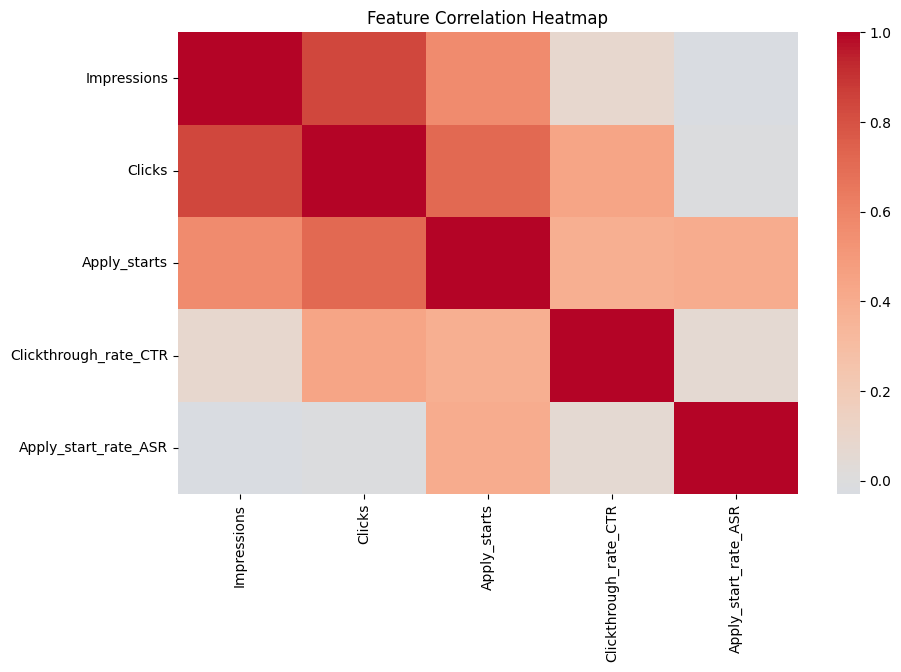

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

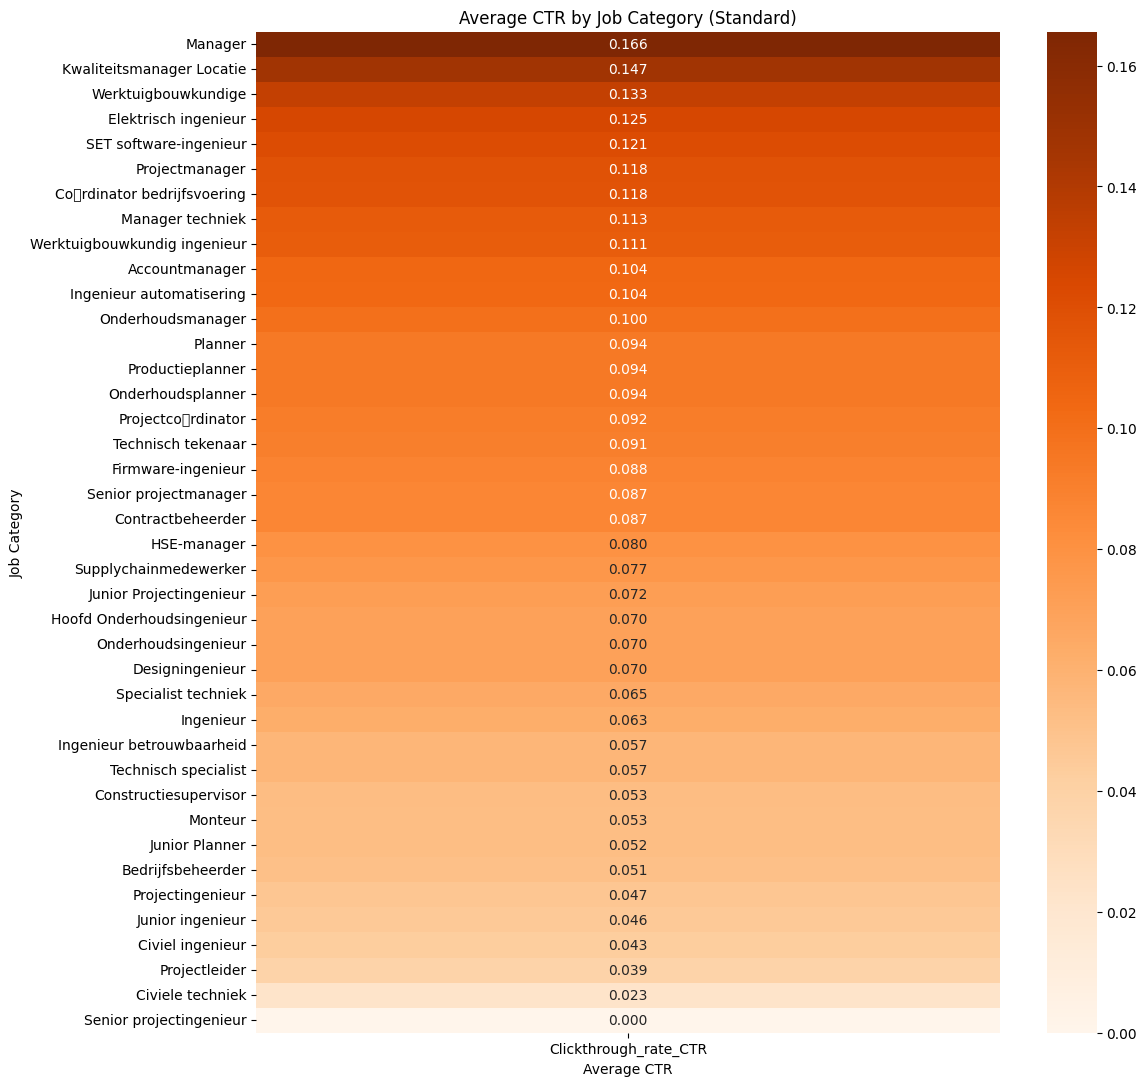

In [27]:
# Aggregate average CTR by job category
job_ctr = df.groupby("Standard")[TARGET_VARIABLE].mean().sort_values(ascending=False)

plt.figure(figsize=(12, max(4, len(job_ctr)//3)))  # dynamic height
sns.heatmap(job_ctr.to_frame(), annot=True, fmt=".3f", cmap="Oranges", cbar=True)
plt.title("Average CTR by Job Category (Standard)")
plt.xlabel("Average CTR")
plt.ylabel("Job Category")
plt.show()

In [28]:
# Nature of the Problem (Automatically Determined)
# This cell links the target variable to the correct ML algorithm type.
target_dtype = df[TARGET_VARIABLE].dtype
unique_values = df[TARGET_VARIABLE].nunique()

if target_dtype in ["int64", "float64"] and unique_values > 10:
    problem_type = "Regression (How many / how much?)"
elif unique_values == 2:
    problem_type = "Binary Classification (True / False)"
else:
    problem_type = "Multi-class Classification"

problem_type

'Regression (How many / how much?)'

this indicates that my main problem will be the lack of the amount of data I have to use in my dataset

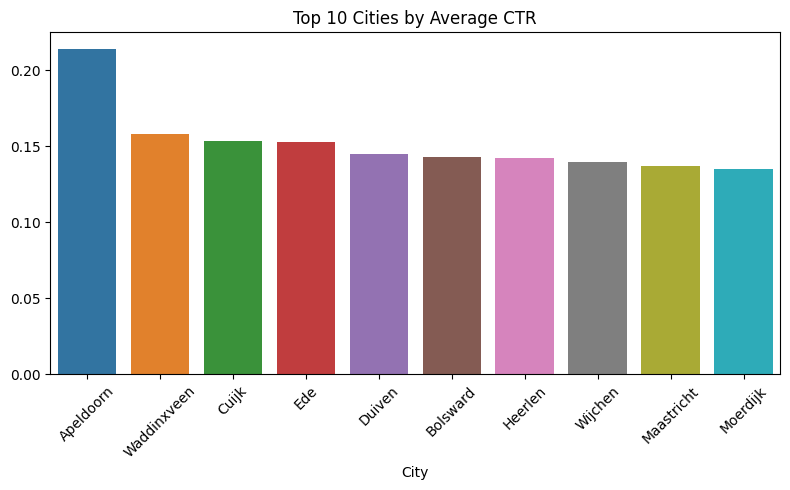

In [29]:
# Top 10 Cities by Average CTR
top_cities = (
    df.groupby("City")[TARGET_VARIABLE]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_cities.index,
    y=top_cities.values,
    hue=top_cities.index,
    legend=False
)
plt.title("Top 10 Cities by Average CTR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

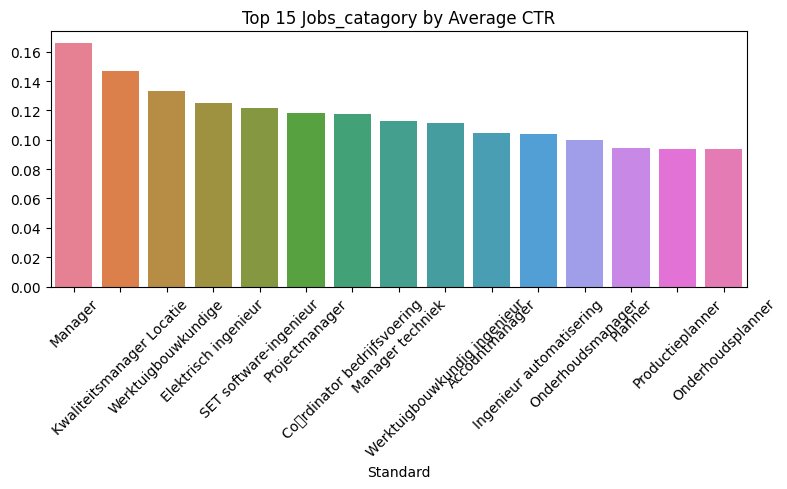

In [30]:
# Top 15 Jobs_catagory by Average CTR
top_cities = (
    df.groupby("Standard")[TARGET_VARIABLE]
      .mean()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_cities.index,
    y=top_cities.values,
    hue=top_cities.index,
    legend=False
)
plt.title("Top 15 Jobs_catagory by Average CTR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

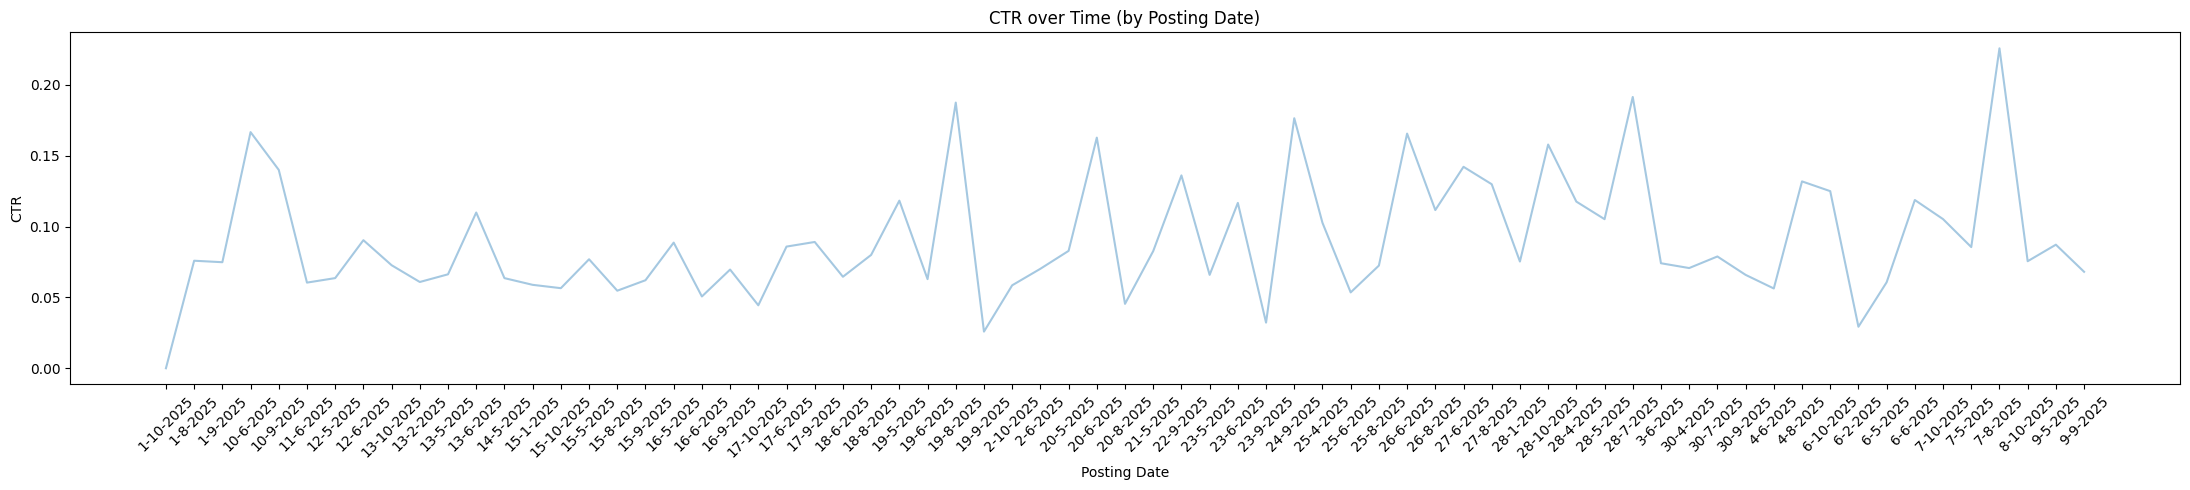

In [31]:
# CTR over Time (by Posting Date)
plt.figure(figsize=(22, 5))

df_sorted = (
    df.groupby("Created")[TARGET_VARIABLE]
      .mean()
)

plt.plot(
    df_sorted.index,
    df_sorted.values,
    alpha=0.4
)

plt.title("CTR over Time (by Posting Date)")
plt.xlabel("Posting Date")
plt.ylabel("CTR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Convert Created to datetime
df["Created"] = pd.to_datetime(df["Created"], errors="coerce", dayfirst=True)
df = df.dropna(subset=["Created"])

# Feature engineering
df["Posting_month"] = df["Created"].dt.month
df["Posting_weekday"] = df["Created"].dt.weekday
df["Posting_quarter"] = df["Created"].dt.quarter
df["Posting_week_of_year"] = df["Created"].dt.isocalendar().week.astype(int)

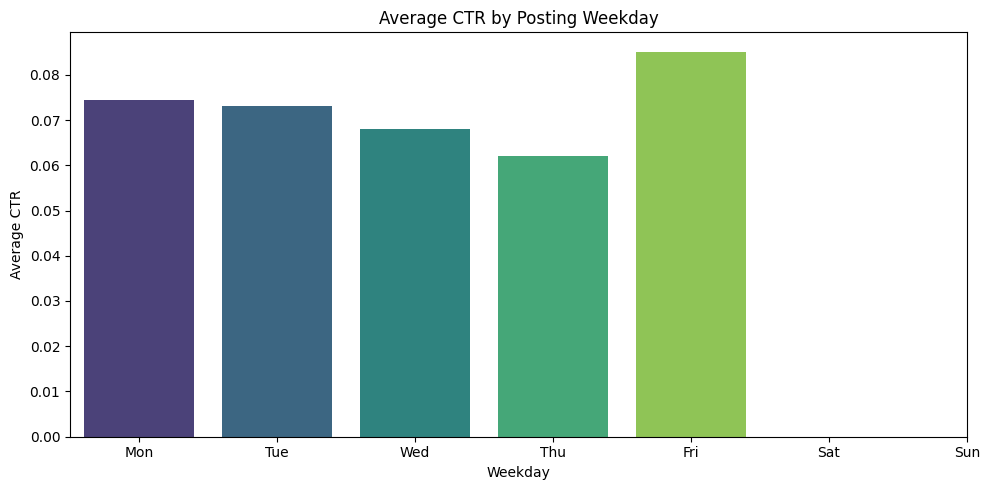

In [33]:
# Aggregate CTR by weekday
weekday_summary = (
    df.groupby("Posting_weekday")[TARGET_VARIABLE]
      .mean()
      .reset_index()
)

# Plot average CTR by posting weekday
plt.figure(figsize=(10, 5))
sns.barplot(
    x=weekday_summary["Posting_weekday"],
    y=weekday_summary[TARGET_VARIABLE],
    palette="viridis"
)

# Customize x-axis labels
plt.xticks(
    ticks=range(7),
    labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
)
plt.title("Average CTR by Posting Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average CTR")
plt.tight_layout()
plt.show()

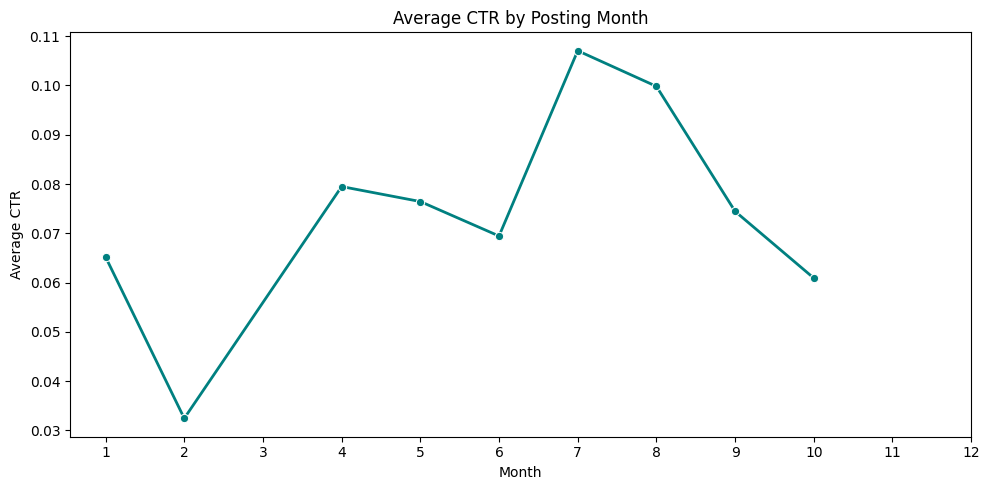

In [34]:
# Aggregate CTR by month
month_summary = (
    df.groupby("Posting_month")[TARGET_VARIABLE]
      .mean()
      .reset_index()
)

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=month_summary["Posting_month"],
    y=month_summary[TARGET_VARIABLE],
    marker="o",
    linewidth=2,
    color="teal"
)

plt.xticks(range(1, 13))
plt.title("Average CTR by Posting Month")
plt.xlabel("Month")
plt.ylabel("Average CTR")
plt.tight_layout()
plt.show()


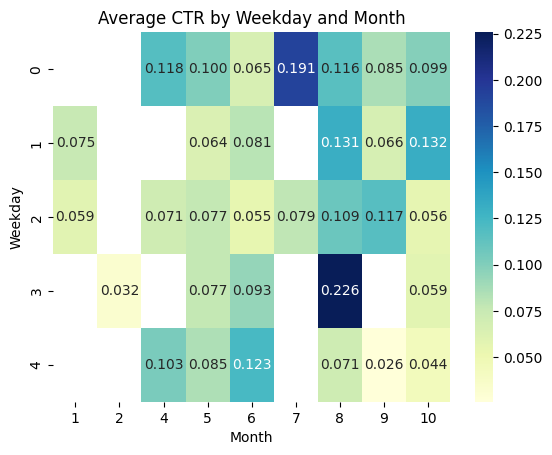

In [35]:
# Weekday vs Month average CTR
heatmap_data = df.pivot_table(
    values=TARGET_VARIABLE,
    index="Posting_weekday",   # 0=Mon, 6=Sun
    columns="Posting_month",
    aggfunc=np.mean
)

sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Average CTR by Weekday and Month")
plt.xlabel("Month")
plt.ylabel("Weekday")
plt.show()

**Covers:**
- Mean
- Standard deviation
- Distribution insight
- Outlier awareness

In [36]:
# Data Dictionary Creation
data_dictionary = []

for col in df.columns:
    data_dictionary.append({
        "Data Element": col,
        "Data Type": str(df[col].dtype),
        "Missing Values": df[col].isna().sum(),
        "Unique Values": df[col].nunique(),
        "Source": "map2.csv"
    })

data_dictionary_df = pd.DataFrame(data_dictionary)
data_dictionary_df

,Data Element,Data Type,Missing Values,Unique Values,Source
0,Job,object,0,214,map2.csv
1,Standard,object,0,40,map2.csv
2,Country,object,0,1,map2.csv
3,State_Region,object,0,12,map2.csv
4,City,object,0,88,map2.csv
5,Impressions,float64,0,244,map2.csv
6,Clicks,float64,0,63,map2.csv
7,Apply_starts,float64,0,13,map2.csv
8,Applies,float64,0,1,map2.csv
9,Cost_per_click_CPC,object,0,242,map2.csv


In [37]:
# Shape of the dataset
df.shape

(531, 23)

# Setting-up Modeling

In [38]:
# Feature selection
categorical_features = ["Job", "Country", "State_Region", "City", "Standard"]
for col in categorical_features:
    df[col] = df[col].astype(str).str.strip()  # remove extra spaces

# Drop rows with missing required values
df = df.dropna(subset=categorical_features + ["Created", TARGET_VARIABLE])

# Handle rare categories
min_freq = 5
for col in categorical_features:
    freq = df[col].value_counts()
    rare = freq[freq < min_freq].index
    df[col] = df[col].replace(rare, "Other")

numerical_features = [
    "Posting_month",
    "Posting_weekday",
    "Posting_quarter",
    "Posting_week_of_year",
    "Impressions",
    "Clicks",
    "Apply_start_rate_ASR"
]

In [39]:
X = df[categorical_features + numerical_features]
y = df[TARGET_VARIABLE]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [40]:
print("Target Variable:", TARGET_VARIABLE)
print("Problem Type:", problem_type)
print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Test samples:", X_test.shape[0])

Target Variable: Clickthrough_rate_CTR
Problem Type: Regression (How many / how much?)
Training samples: 265
Validation samples: 133
Test samples: 133


In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

In [42]:
ridge_model = Ridge(alpha=1.0)

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,           # limit depth
    max_features="sqrt",   # consider sqrt features per split
    min_samples_leaf=3,    # min samples per leaf
    random_state=42,
    n_jobs=-1
)

xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

pipeline_ridge = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", ridge_model)
    ]
)

pipeline_rf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", rf_model)
    ]
)

pipeline_xgb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", xgb_model)
    ]
)

In [43]:
pipeline_ridge.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# RandomForestRegressor - Model

In [44]:
# =========================
# Evaluation
# =========================
model = pipeline_rf  # Choose the model to evaluate

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.6f}")
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred):.6f}")

# =========================
# Cross-validation
# =========================

cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("\nCross-validated R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


--- Model Evaluation ---
Train R²: 0.5673
Test R²:  0.3020
Train MSE: 0.000786
Test MSE:  0.001109

Cross-validated R² scores: [ 0.33040937  0.39142422 -0.04143417  0.17298508  0.1324506 ]
Mean CV R²: 0.19716702004952663


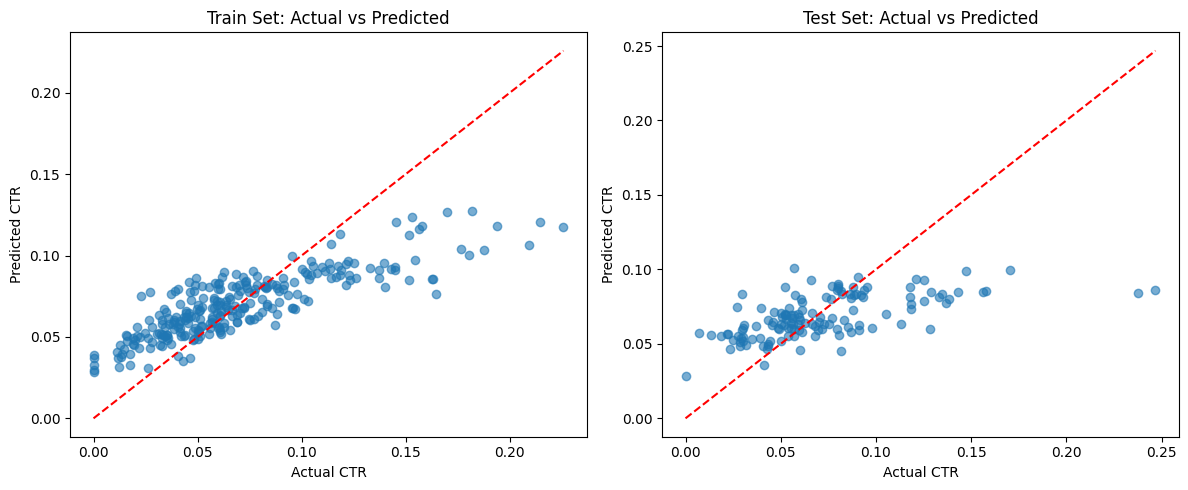

In [45]:
# =========================================================
# Predicted vs Actual (Train & Test)
# =========================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    "r--"
)
plt.xlabel("Actual CTR")
plt.ylabel("Predicted CTR")
plt.title("Train Set: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--"
)
plt.xlabel("Actual CTR")
plt.ylabel("Predicted CTR")
plt.title("Test Set: Actual vs Predicted")

plt.tight_layout()
plt.show()

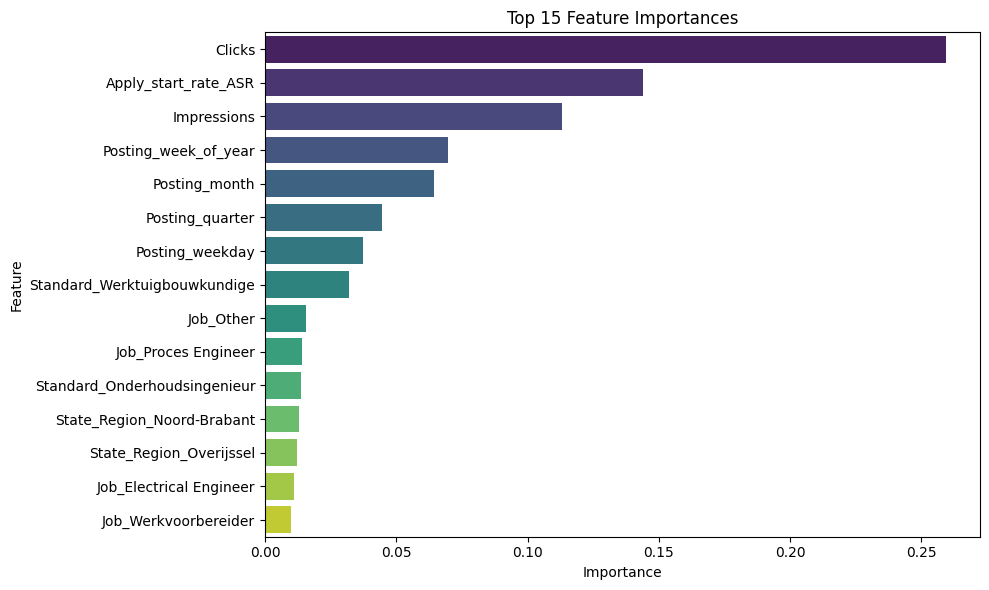

In [46]:
# =========================================================
# Feature importance
# =========================================================
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([cat_feature_names, numerical_features])

importances = model.named_steps["regressor"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(15), 
    hue=feature_importance_df.head(15)["Feature"], 
    legend=False,
    palette="viridis"
)
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

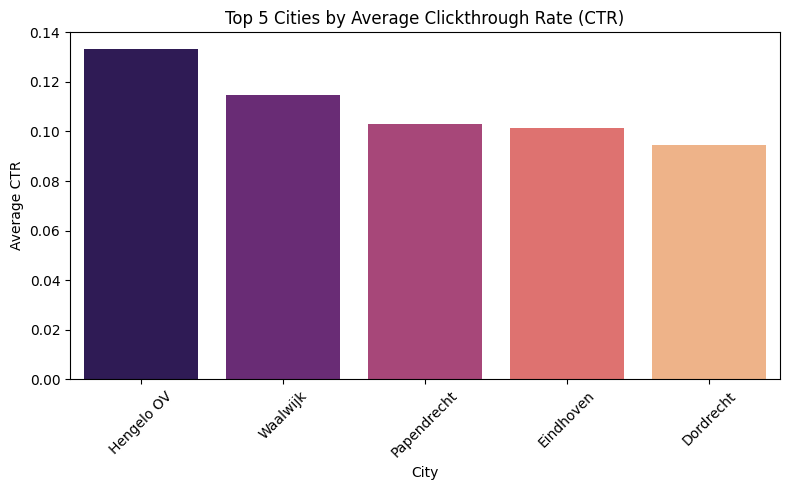

In [47]:
# =========================================================
# Top 5 Cities by Average CTR
# =========================================================
top_cities = (
    df.groupby("City")[TARGET_VARIABLE]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_cities.index,
    y=top_cities.values,
    hue=top_cities.index,
    legend=False,
    palette="magma"
)
plt.title("Top 5 Cities by Average Clickthrough Rate (CTR)")
plt.ylabel("Average CTR")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Aggregated Feature Importance:
    Feature  Importance
3   Created    0.146502
0       Job    0.083064
2  Standard    0.066381
1      City    0.053078


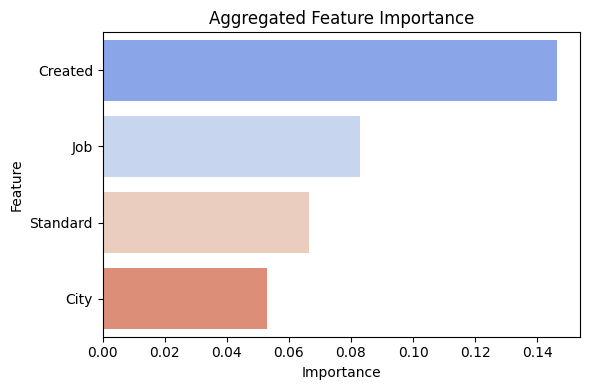

In [48]:
# =========================
# Aggregate importance by main variable
# =========================

# Identify dummy prefixes
job_cols = [f for f in all_feature_names if f.startswith("Job_")]
city_cols = [f for f in all_feature_names if f.startswith("City_")]
standard_cols = [f for f in all_feature_names if f.startswith("Standard_")]
created_cols = ["Posting_month", "Posting_weekday", "Posting_quarter"]

# Helper function to sum importance safely
def sum_importance(cols, feature_names, importances):
    idx = [np.where(feature_names == c)[0][0] for c in cols if c in feature_names]
    return importances[idx].sum() if len(idx) > 0 else 0

# Sum importance per variable
job_importance = sum_importance(job_cols, all_feature_names, importances)
city_importance = sum_importance(city_cols, all_feature_names, importances)
standard_importance = sum_importance(standard_cols, all_feature_names, importances)
created_importance = sum_importance(created_cols, all_feature_names, importances)

# Create dataframe
agg_importance_df = pd.DataFrame({
    "Feature": ["Job", "City", "Standard", "Created"],
    "Importance": [
        job_importance,
        city_importance,
        standard_importance,
        created_importance
    ]
}).sort_values(by="Importance", ascending=False)

print("\nAggregated Feature Importance:")
print(agg_importance_df)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    x="Importance",
    y="Feature",
    data=agg_importance_df,
    hue="Feature",
    legend=False,
    palette="coolwarm"
)
plt.title("Aggregated Feature Importance")
plt.tight_layout()
plt.show()

## Random Forest Predicting Clickthrough Rate (CTR)

### Target
- Clickthrough Rate (CTR)

### Features
- Job
- City
- Standardized Job Title
- Impressions
- Clicks
- Apply_start_rate_ASR
- Temporal features

### Results
Train R²: 0.5673
Test R²:  0.3020
Train MSE: 0.000786
Test MSE:  0.001109
Mean CV R²: 0.197

### Interpretation  
Random Forest struggles with:
- Sparse categorical data
- Limited sample size

### Conclusion
CTR is selected as the preferred target metric going forward.

# XGBoost - Model

In [49]:
# =========================
# Evaluation
# =========================
model = pipeline_xgb  # Choose the model to evaluate

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.6f}")
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred):.6f}")

# =========================
# Cross-validation
# =========================

cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("\nCross-validated R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


--- Model Evaluation ---
Train R²: 0.9998
Test R²:  0.7941
Train MSE: 0.000000
Test MSE:  0.000327

Cross-validated R² scores: [0.95597776 0.94670165 0.74747424 0.90684441 0.95521664]
Mean CV R²: 0.9024429410973551


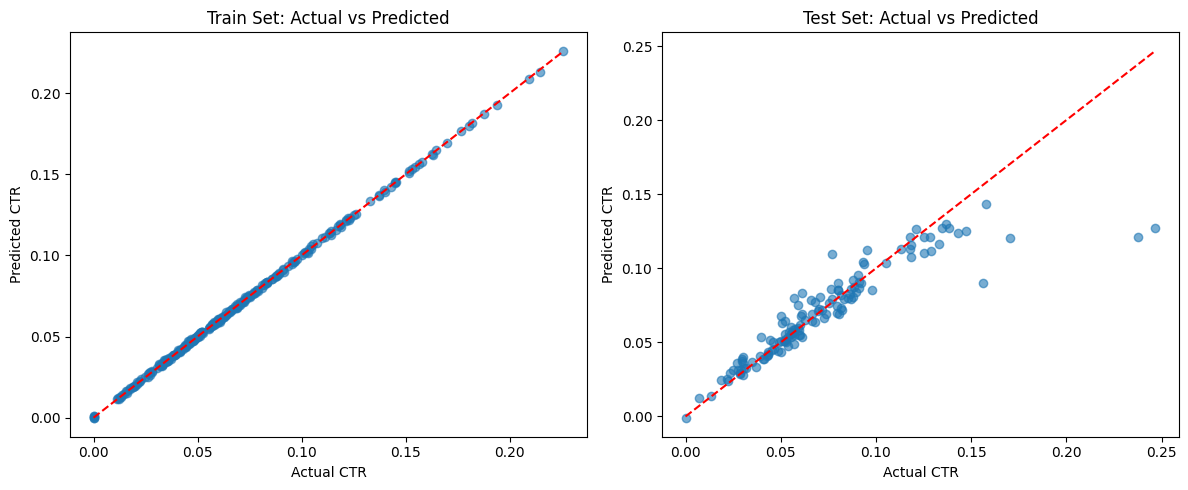

In [50]:
# =========================================================
# Predicted vs Actual (Train & Test)
# =========================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    "r--"
)
plt.xlabel("Actual CTR")
plt.ylabel("Predicted CTR")
plt.title("Train Set: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--"
)
plt.xlabel("Actual CTR")
plt.ylabel("Predicted CTR")
plt.title("Test Set: Actual vs Predicted")

plt.tight_layout()
plt.show()

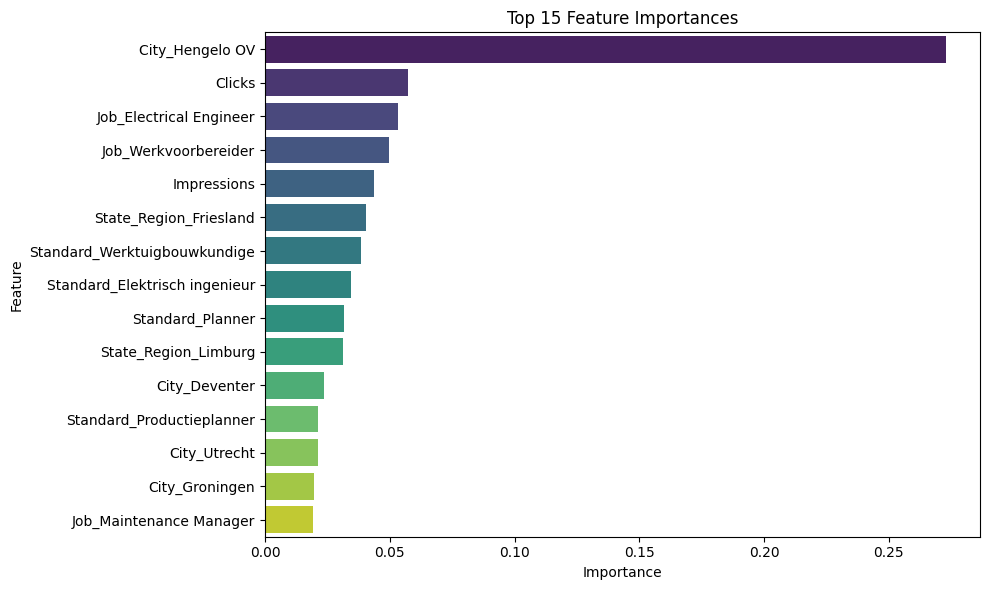

In [51]:
# =========================================================
# Feature importance
# =========================================================
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([cat_feature_names, numerical_features])

importances = model.named_steps["regressor"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(15), 
    hue=feature_importance_df.head(15)["Feature"], 
    legend=False,
    palette="viridis"
)
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

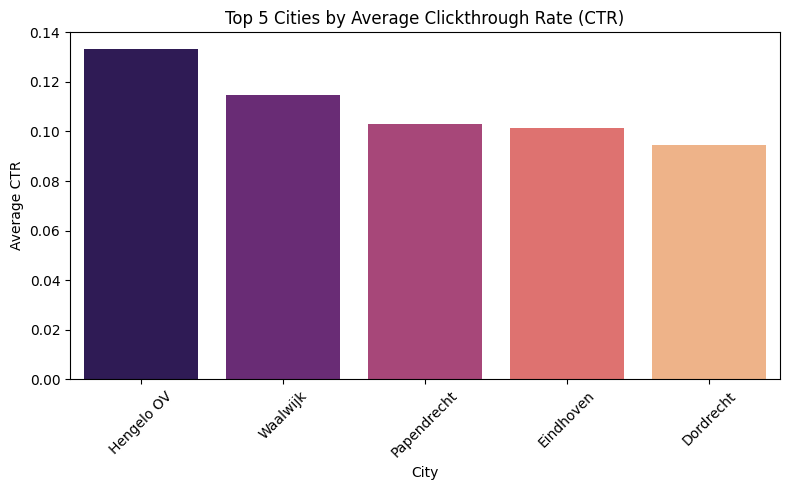

In [52]:
# =========================================================
# Top 5 Cities by Average CTR
# =========================================================
top_cities = (
    df.groupby("City")[TARGET_VARIABLE]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_cities.index,
    y=top_cities.values,
    hue=top_cities.index,
    legend=False,
    palette="magma"
)
plt.title("Top 5 Cities by Average Clickthrough Rate (CTR)")
plt.ylabel("Average CTR")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Aggregated Feature Importance:
    Feature  Importance
1      City    0.436798
0       Job    0.161648
2  Standard    0.150909
3   Created    0.008241


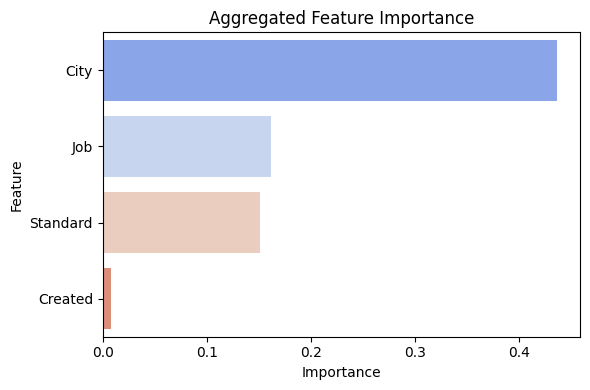

In [53]:
# =========================
# Aggregate importance by main variable
# =========================

# Identify dummy prefixes
job_cols = [f for f in all_feature_names if f.startswith("Job_")]
city_cols = [f for f in all_feature_names if f.startswith("City_")]
standard_cols = [f for f in all_feature_names if f.startswith("Standard_")]
created_cols = ["Posting_month", "Posting_weekday", "Posting_quarter"]

# Helper function to sum importance safely
def sum_importance(cols, feature_names, importances):
    idx = [np.where(feature_names == c)[0][0] for c in cols if c in feature_names]
    return importances[idx].sum() if len(idx) > 0 else 0

# Sum importance per variable
job_importance = sum_importance(job_cols, all_feature_names, importances)
city_importance = sum_importance(city_cols, all_feature_names, importances)
standard_importance = sum_importance(standard_cols, all_feature_names, importances)
created_importance = sum_importance(created_cols, all_feature_names, importances)

# Create dataframe
agg_importance_df = pd.DataFrame({
    "Feature": ["Job", "City", "Standard", "Created"],
    "Importance": [
        job_importance,
        city_importance,
        standard_importance,
        created_importance
    ]
}).sort_values(by="Importance", ascending=False)

print("\nAggregated Feature Importance:")
print(agg_importance_df)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    x="Importance",
    y="Feature",
    data=agg_importance_df,
    hue="Feature",
    legend=False,
    palette="coolwarm"
)
plt.title("Aggregated Feature Importance")
plt.tight_layout()
plt.show()

## XGBoost Model (Overfitting Observed)

### Objective
Evaluate whether a more powerful model improves performance.

### Target
- Clickthrough Rate (CTR)

### Features
- Job
- City
- Standardized Job Title
- Impressions
- Clicks
- Apply_start_rate_ASR
- Temporal features

### Results
Train R²: 0.9998
Test R²:  0.7941
Train MSE: 0.000000
Test MSE:  0.000327
Mean CV R²: 0.902

### Interpretation
XGBoost heavily overfits due to:
- High model complexity
- Small dataset
- High-cardinality categorical features

### Conclusion
More complex models worsen generalization.  
Model complexity must match data quality.

# Ridge -  Model

In [54]:
model = pipeline_ridge  # Choose the model to evaluate

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.6f}")
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred):.6f}")

# =========================
# Cross-validation
# =========================

cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("\nCross-validated R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


--- Model Evaluation ---
Train R²: 0.6751
Test R²:  0.4906
Train MSE: 0.000590
Test MSE:  0.000809

Cross-validated R² scores: [ 0.45637616  0.41415472  0.20754467 -0.03498133  0.06179116]
Mean CV R²: 0.22097707361049385


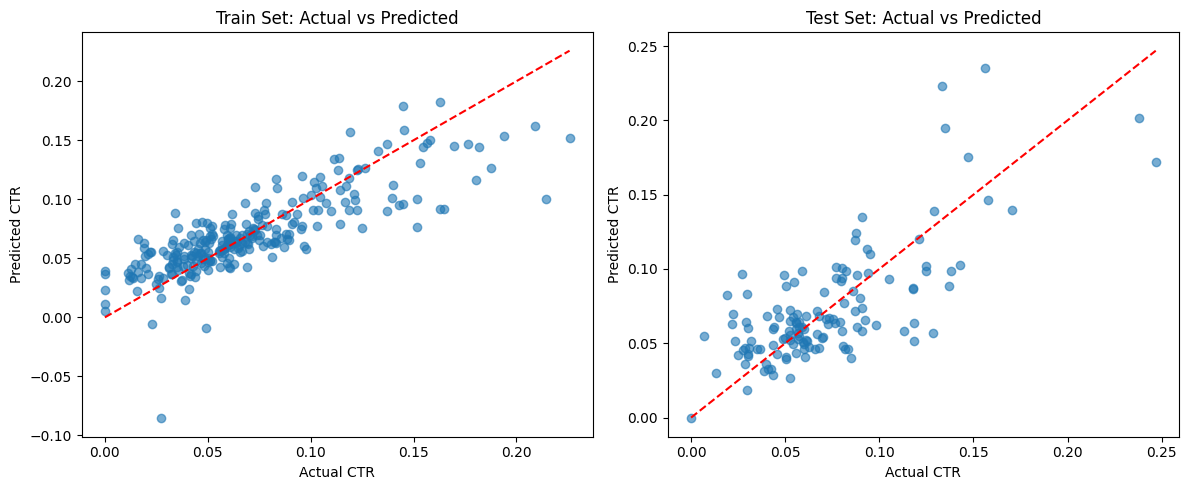

In [55]:
# =========================================================
# Predicted vs Actual (Train & Test)
# =========================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    "r--"
)
plt.xlabel("Actual CTR")
plt.ylabel("Predicted CTR")
plt.title("Train Set: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--"
)
plt.xlabel("Actual CTR")
plt.ylabel("Predicted CTR")
plt.title("Test Set: Actual vs Predicted")

plt.tight_layout()
plt.show()

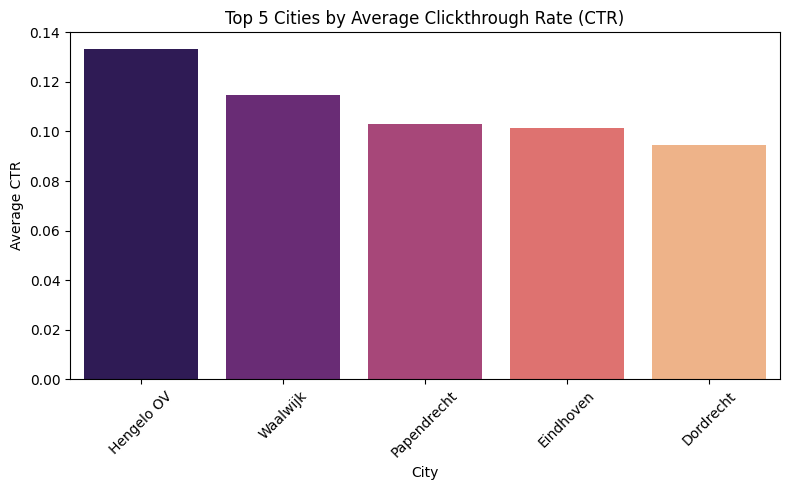

In [56]:
# =========================================================
# Top 5 Cities by Average CTR
# =========================================================
top_cities = (
    df.groupby("City")[TARGET_VARIABLE]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_cities.index,
    y=top_cities.values,
    hue=top_cities.index,
    legend=False,
    palette="magma"
)
plt.title("Top 5 Cities by Average Clickthrough Rate (CTR)")
plt.ylabel("Average CTR")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Aggregated Feature Importance:
    Feature  Importance
1      City    0.436798
0       Job    0.161648
2  Standard    0.150909
3   Created    0.008241


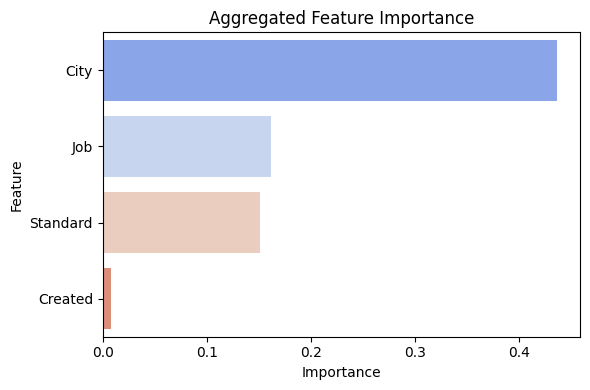

In [57]:
# =========================
# Aggregate importance by main variable
# =========================
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([cat_feature_names, numerical_features])

# Identify dummy prefixes
job_cols = [f for f in all_feature_names if f.startswith("Job_")]
city_cols = [f for f in all_feature_names if f.startswith("City_")]
standard_cols = [f for f in all_feature_names if f.startswith("Standard_")]
created_cols = ["Posting_month", "Posting_weekday", "Posting_quarter"]

# Helper function to sum importance safely
def sum_importance(cols, feature_names, importances):
    idx = [np.where(feature_names == c)[0][0] for c in cols if c in feature_names]
    return importances[idx].sum() if len(idx) > 0 else 0

# Sum importance per variable
job_importance = sum_importance(job_cols, all_feature_names, importances)
city_importance = sum_importance(city_cols, all_feature_names, importances)
standard_importance = sum_importance(standard_cols, all_feature_names, importances)
created_importance = sum_importance(created_cols, all_feature_names, importances)

# Create dataframe
agg_importance_df = pd.DataFrame({
    "Feature": ["Job", "City", "Standard", "Created"],
    "Importance": [
        job_importance,
        city_importance,
        standard_importance,
        created_importance
    ]
}).sort_values(by="Importance", ascending=False)

print("\nAggregated Feature Importance:")
print(agg_importance_df)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    x="Importance",
    y="Feature",
    data=agg_importance_df,
    hue="Feature",
    legend=False,
    palette="coolwarm"
)
plt.title("Aggregated Feature Importance")
plt.tight_layout()
plt.show()

## Ridge Regression (Best Performing Model)

### Objective
Test a simpler, regularized model suitable for sparse data.

### Target
- Clickthrough Rate (CTR)

### Features
- Job
- City
- Standardized Job Title
- Impressions
- Clicks
- Apply_start_rate_ASR
- Temporal features

### Results
Train R²: 0.6751
Test R²:  0.4906
Train MSE: 0.000590
Test MSE:  0.000809
Mean CV R²: 0.220 
- Best generalization among all valid models

### Interpretation
Ridge Regression performs best because:
- Linear assumptions match weak signal
- Regularization reduces overfitting
- Handles one-hot encoded categorical data well

### Conclusion
Ridge Regression is the most appropriate model given the current dataset.

## Cross-Validation Insights

Across all tests, cross-validation R² scores are low or negative.

This is expected due to:
- Small sample size
- Category sparsity
- Unseen categories across folds

Low CV scores indicate **data instability**, not incorrect modeling.

---

## Exploratory Data Analysis and Feature Insights

Feature importance and aggregated analysis consistently show:
- City and Job explain most variance
- Standardized job titles improve signal
- Temporal features contribute minimally

EDA is therefore essential for:
- Feature selection
- Target metric choice
- Model selection decisions


## Opportunities for Predictive Analytics

- CTR is more predictable than ASR (there is still a discusion to have if CTR is better to use then ASR in practice)
- Standardization improves aggregation
- Linear models are currently best suited

With additional data, the following become feasible:
- More reliable forecasting
- Use of non-linear models
- Campaign performance optimization before publishing

---

## Final Conclusion

This project demonstrates:
- Proper data aggregation and preparation
- Transparent modeling iterations
- Critical evaluation of model limitations

The main limitation is **data quality and quantity**, not modeling technique.  
Ridge Regression provides the best balance between bias and variance for this dataset.
